In [33]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.utils.data as tud
import torch.optim as optim 
import matplotlib.pyplot as plt
#import helper

#import imageio
import numpy as np

#from torchvision.utils import make_grid, save_image
from tqdm import tqdm

In [38]:
batch_size = 64
#path = r"C:\Users\asus\Documents\ML_Ahtisham_Passat_dataset\gpr_passat_dataset_HAB"
dataset_int = datasets.ImageFolder(r"C:\Users\asus\Documents\ML_Ahtisham_Passat_dataset\dataset_passat_images",
                      transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                      transforms.Resize(255),
                                                      transforms.CenterCrop(224),
                                                      #transforms.Normalize((0.5,), (0.5,)),
                                                      transforms.ToTensor(),]))

dataset_int_loader = tud.DataLoader(dataset_int, batch_size=batch_size, shuffle=True)

In [42]:
for data in dataset_int_loader:
    #print(data)
    break
    
    
    
data_iter = iter(dataset_int_loader)
images, labels = data_iter.next()
print(torch.min(images), torch.max(images))

[tensor([[[[0.5647, 0.5569, 0.5176,  ..., 0.5137, 0.5059, 0.5059],
          [0.5608, 0.5412, 0.5059,  ..., 0.5059, 0.4980, 0.4784],
          [0.5529, 0.5176, 0.4863,  ..., 0.4941, 0.4902, 0.4667],
          ...,
          [0.4863, 0.5059, 0.4824,  ..., 0.4902, 0.4745, 0.4824],
          [0.4824, 0.5020, 0.4902,  ..., 0.4980, 0.4784, 0.4784],
          [0.4902, 0.5216, 0.5098,  ..., 0.5176, 0.5020, 0.4667]]],


        [[[0.4392, 0.4196, 0.5373,  ..., 0.5216, 0.4471, 0.6039],
          [0.4549, 0.4118, 0.5412,  ..., 0.5255, 0.5255, 0.6078],
          [0.5059, 0.4941, 0.5686,  ..., 0.5882, 0.6157, 0.5804],
          ...,
          [0.5333, 0.4745, 0.5137,  ..., 0.4157, 0.4549, 0.5412],
          [0.5647, 0.4667, 0.4980,  ..., 0.4549, 0.4902, 0.5686],
          [0.5608, 0.4863, 0.5216,  ..., 0.4980, 0.5373, 0.5373]]],


        [[[0.4902, 0.4980, 0.4588,  ..., 0.4784, 0.4784, 0.4706],
          [0.4784, 0.4980, 0.4588,  ..., 0.4863, 0.4784, 0.4706],
          [0.4745, 0.4980, 0.4627,  .

In [30]:
labels.shape

torch.Size([64])

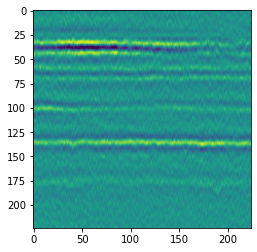

In [40]:
plt.imshow(data[0][0].view(224,224))

In [43]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(224*224, 128), # (BS,784) --> (BS,128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12), 
            nn.ReLU(),
            nn.Linear(12, 3)     #output BS x 3   
        )
        
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128), 
            nn.ReLU(),
            nn.Linear(128, 224*224),     #output BS x 784   
            nn.Sigmoid()       #min: tensor(0.), max: tensor(1.)
        )
        
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [44]:
lr = 0.003
weight_decay = 0.00005
AE = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(), lr = lr) #w/o weight_decay

  0%|          | 0/84 [00:00<?, ?it/s]D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\torch\autograd\__init__.py:147: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(
100%|██████████| 84/84 [01:14<00:00,  1.13it/s]


Epoch 0 of 15
loss: 0.0093


100%|██████████| 84/84 [01:06<00:00,  1.27it/s]


Epoch 1 of 15
loss: 0.0087


100%|██████████| 84/84 [01:08<00:00,  1.22it/s]


Epoch 2 of 15
loss: 0.0102


100%|██████████| 84/84 [01:09<00:00,  1.20it/s]


Epoch 3 of 15
loss: 0.0087


100%|██████████| 84/84 [01:10<00:00,  1.20it/s]


Epoch 4 of 15
loss: 0.0072


100%|██████████| 84/84 [01:12<00:00,  1.16it/s]


Epoch 5 of 15
loss: 0.0120


100%|██████████| 84/84 [01:14<00:00,  1.13it/s]


Epoch 6 of 15
loss: 0.0074


100%|██████████| 84/84 [01:21<00:00,  1.03it/s]


Epoch 7 of 15
loss: 0.0089


100%|██████████| 84/84 [01:22<00:00,  1.02it/s]


Epoch 8 of 15
loss: 0.0106


100%|██████████| 84/84 [01:27<00:00,  1.05s/it]


Epoch 9 of 15
loss: 0.0089


100%|██████████| 84/84 [01:28<00:00,  1.06s/it]


Epoch 10 of 15
loss: 0.0131


100%|██████████| 84/84 [01:28<00:00,  1.06s/it]


Epoch 11 of 15
loss: 0.0081


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Epoch 12 of 15
loss: 0.0089


100%|██████████| 84/84 [01:33<00:00,  1.11s/it]


Epoch 13 of 15
loss: 0.0090


100%|██████████| 84/84 [01:28<00:00,  1.06s/it]


Epoch 14 of 15
loss: 0.0094


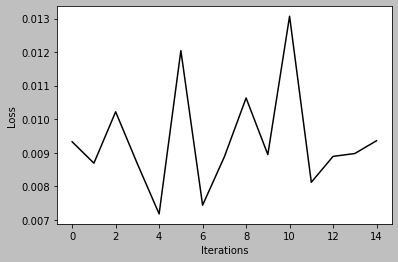

In [47]:
epochs = 15
outputs = []
img = []
ae_loss = []
for epoch in range(epochs):
    for (image,_) in tqdm(dataset_int_loader):
        image = image.view(-1, 224*224)
        reconstructed = AE(image)
        loss = criterion(reconstructed, image)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    print(f"Epoch {epoch} of {epochs}")
    print(f"loss: {loss.item():.4f}")
    outputs.append((epoch, image, reconstructed))
    ae_loss.append(loss)     
                          
                          
                          
    #ae_img = AE(image).detach()
    #ae_img = make_grid(generated_img)
    #save_ae_image(ae_img, f"{epoch}.png")
    #img.append(ae_img)
    
    
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)


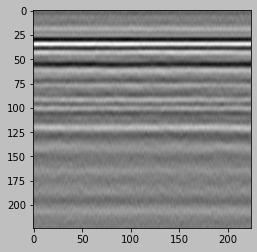

In [48]:
#plotting the corresponding original image
for i, item in enumerate(image):  
  item = item.view(-1, 224, 224).detach()
  plt.imshow(item[0])



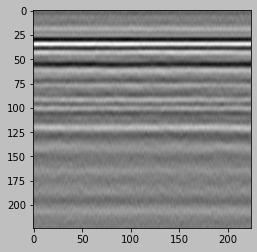

In [49]:
#plotting the image generated by the AE
for i, item in enumerate(reconstructed):
  item = item.view(-1, 224, 224).detach()
  plt.imshow(item[0])